In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.ndimage import gaussian_filter1d
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
from scipy import signal

In [10]:
#get the data overview
data_path = '/Users/karenlee/Documents/VS_code/Hackkthon/data/Track_wear_m06_spot_turn.xlsx'
df = pd.read_excel(data_path , engine = 'openpyxl') 
df.head()

,Zeit -,n_sprocket_left - U/min,x_sprocket_left - mm,torque_travel_left - Nm,torque_travel_right - Nm,p_track_tension_left - bar,p_track_tension_right - bar
0,0.000000,0.000034,0.000000,1.321088,0.250282,39.281631,52.370979
1,0.000833,0.000034,0.000003,1.382598,0.224518,39.274406,52.369591
2,0.001667,0.000034,0.000005,1.266326,0.267108,39.260303,52.369404
3,0.002500,0.000034,0.000008,1.197580,0.344828,39.264931,52.369606
4,0.003333,0.000034,0.000011,1.277175,0.299051,39.273117,52.369202


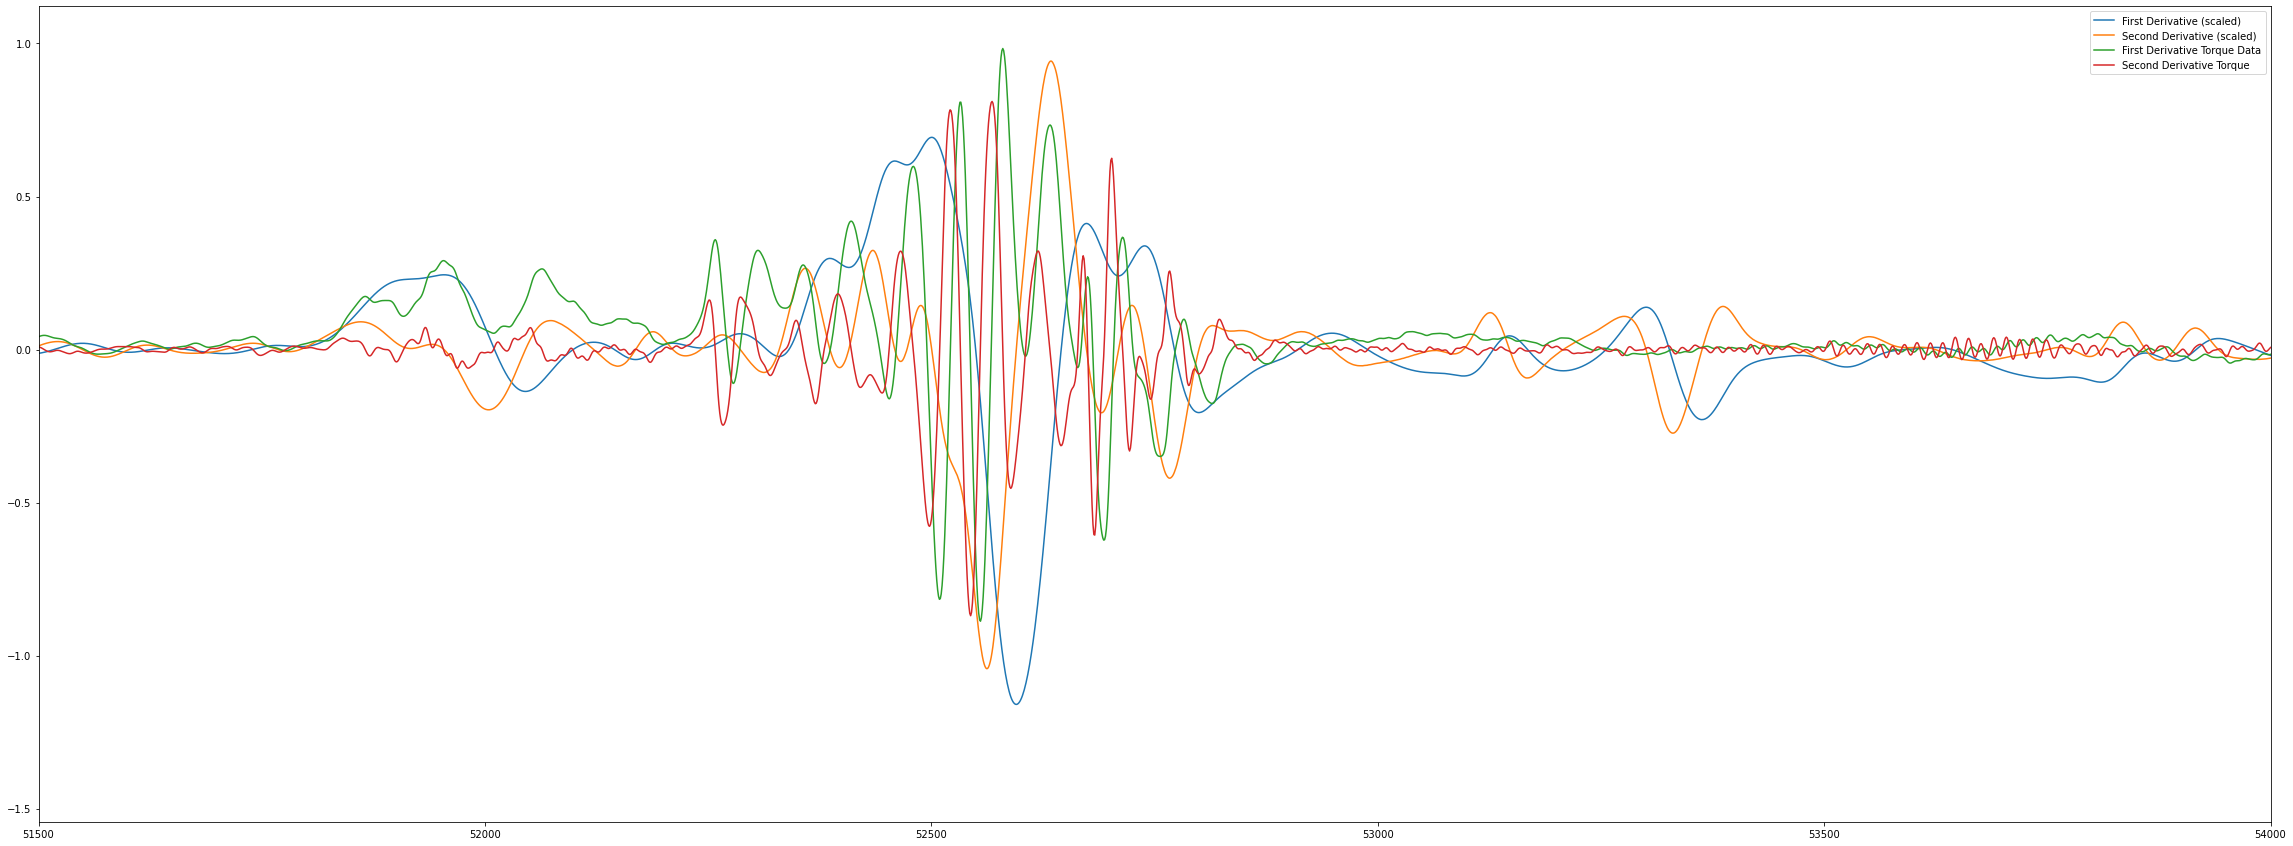

In [71]:
x = df["Zeit - "]
y = df["n_sprocket_left - U/min"]
z = df["torque_travel_left - Nm"]

# smoothening
smooth = gaussian_filter1d(y, 20)
# compute derivatives
smooth_d1 = np.gradient(smooth)
smooth_d2 = np.gradient(smooth_d1)
smoothsmooth_d2 = gaussian_filter1d(smooth_d2, 50)
peaks, _ = find_peaks(smoothsmooth_d2)

# find local extrema
#max = argrelextrema(smooth_d1, np.greater)
#print(max)
# find switching points
#infls = np.where(np.diff(np.sign(smooth_d2)))[0]

# plot results
plt.figure(figsize=(40, 15))
#rpm data
#plt.plot(y, label='RPM Data')
#plt.plot(smooth, label='Smoothed RPM Data')
plt.plot((smooth_d1 / np.max(smooth_d1)), label='First Derivative (scaled)')
plt.plot((smooth_d2 / np.max(smooth_d2)), label='Second Derivative (scaled)')
#plt.plot((smoothsmooth_d2 / np.max(smoothsmooth_d2)), label='Smoothened Second Derivative (scaled)')
#plt.plot(peaks,smoothsmooth_d2[peaks]/ np.max(smoothsmooth_d2),"o", label='Peaks')

#torque data
# smoothening
smooth_torque = gaussian_filter1d(z, 5)
# compute derivatives
smooth_d1_torque = np.gradient(smooth_torque)
smooth_d2_torque = np.gradient(smooth_d1_torque)
smoothsmooth_d2_torque = gaussian_filter1d(smooth_d2_torque, 50)
peaks_torque, _ = find_peaks(smoothsmooth_d2_torque)

#plt.plot(z, label='Torque Data') #original torque
#plt.plot(smooth_torque, label='Smoothed Torque Data')
plt.plot((smooth_d1_torque / np.max(smooth_d1_torque)),label="First Derivative Torque Data")
plt.plot((smooth_d2_torque / np.max(smooth_d2_torque)), label='Second Derivative Torque')
#plt.plot((smoothsmooth_d2_torque / np.max(smoothsmooth_d2_torque)), label='Smoothened Second Derivative Torque')
#plt.plot(peaks_torque,smoothsmooth_d2_torque[peaks_torque]/ np.max(smoothsmooth_d2_torque),"o", label='Peaks')


plt.xlim(51500, 54000) #xlim for one secction
#plt.ylim(-2, 6)

#plt.plot(max, label='Maxima')

#for i, infl in enumerate(infls, 1):
#    plt.axvline(x=infl, color='k', label=f'Inflection Point {i}')
#plt.plot(y[94], 5, marker="o", markersize=20)
#plt.legend(bbox_to_anchor=(1.55, 1.0))
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


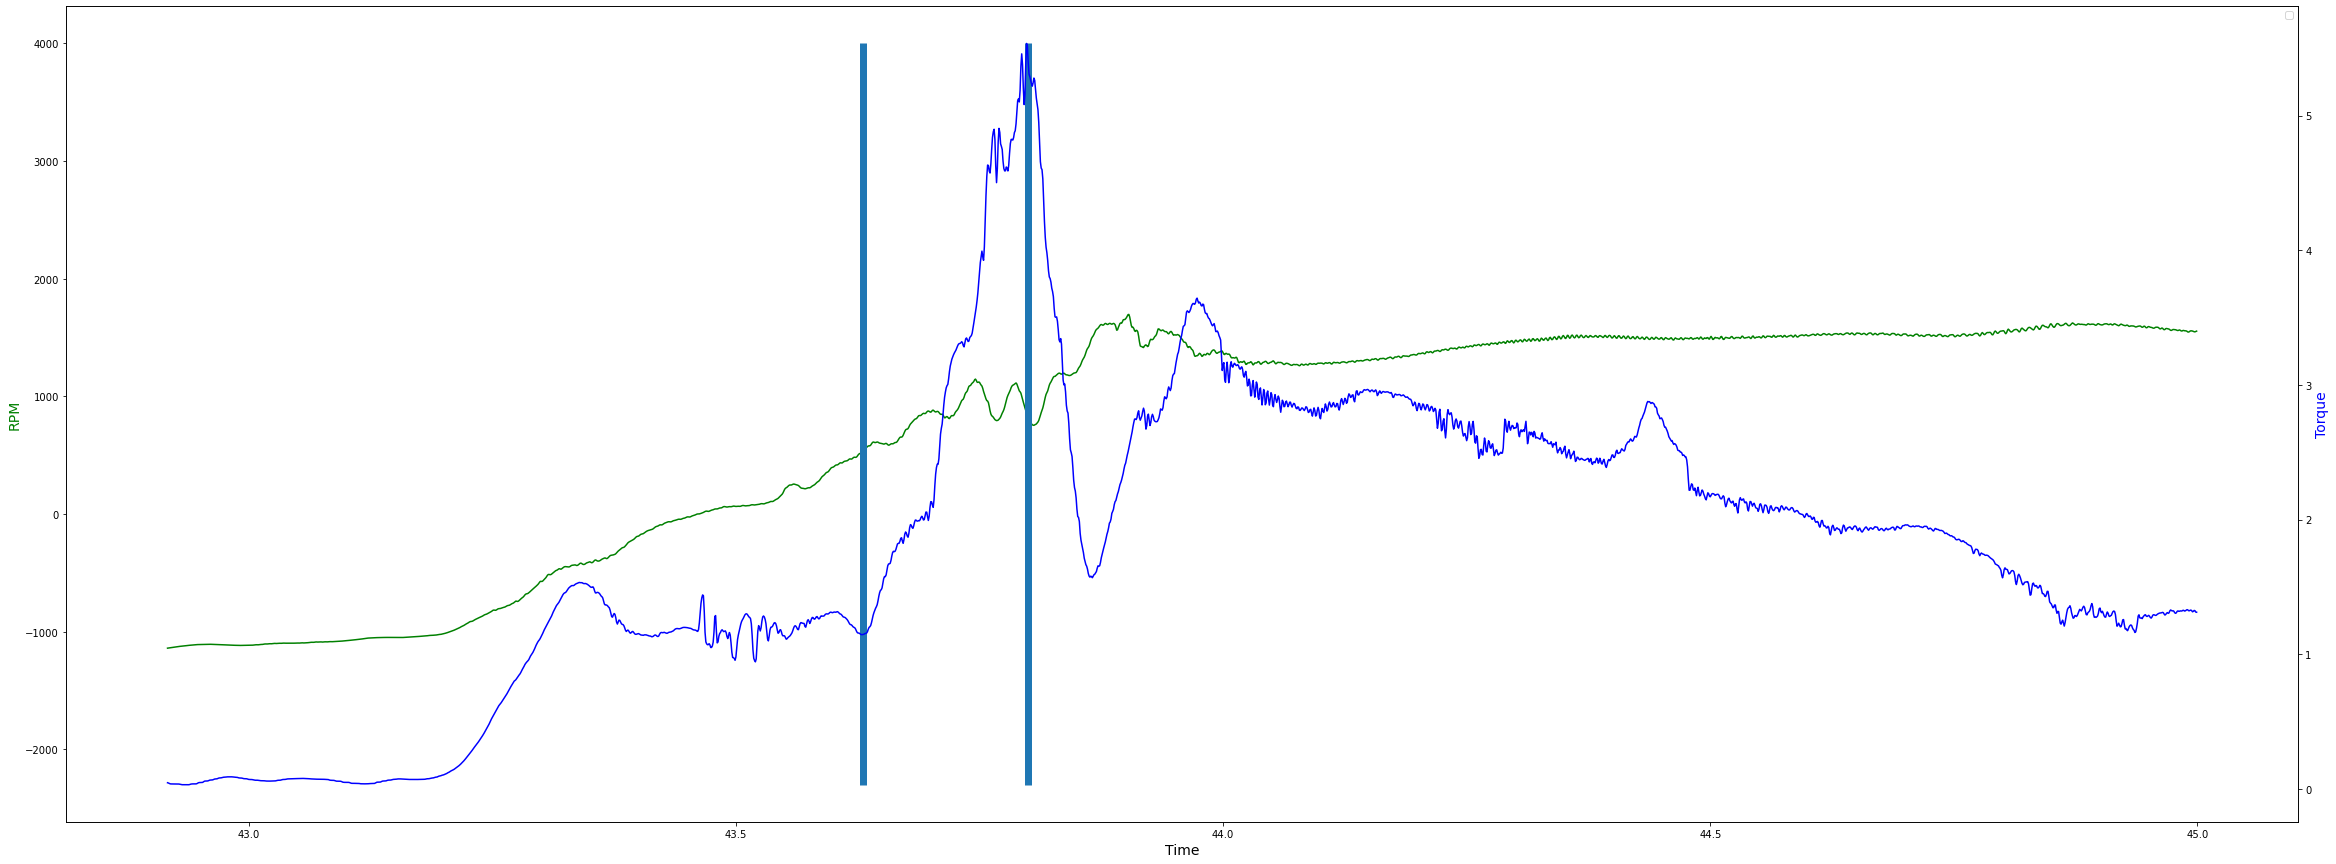

In [70]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (40,15))
# make a plot
ax.plot(x[51500:54000],z[51500:54000],color="green")
ax.vlines(43.8,4000,-2300, label='E2',linewidth=7) #x, ymin, ymax
ax.vlines(43.63,4000,-2300, label='E2',linewidth=7) #x, ymin, ymax

# set x-axis label
ax.set_xlabel("Time", fontsize = 14)
# set y-axis label
ax.set_ylabel("RPM",color="green",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x[51500:54000], y[51500:54000] ,color="blue")
ax2.set_ylabel("Torque",color="blue",fontsize=14)
#ax.set_xlim([51500, 54000])

# only one line may be specified; full height
#ax.vlines(51500,0,3)
plt.legend()
plt.show()
